In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [3]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace = True, header = None)
Y_train = pd.read_csv('UCI HAR Dataset/train/Y_train.txt', delim_whitespace = True, header = None)

In [4]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


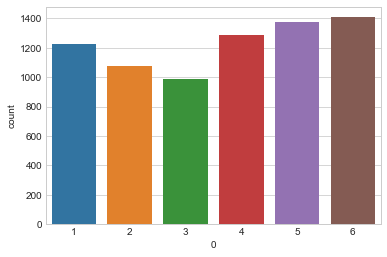

In [13]:
sb.set_style('whitegrid')
sb.countplot(x=Y_train[0])

Data doesn't have too much variations.
3 -- lowest value
6 -- highest values

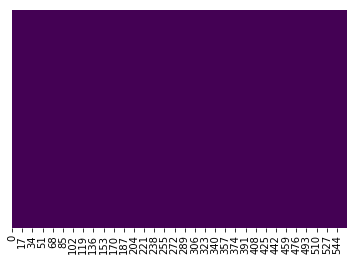

In [11]:
X_train.isnull()
sb.heatmap(X_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

No null values in the X_train data

In [15]:
Y_train[0] = pd.Categorical(Y_train[0]) 
Y_train.describe()
type(Y_train[0])
pd.get_dummies(Y_train).describe()

,0_1,0_2,0_3,0_4,0_5,0_6
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.166757,0.145947,0.134113,0.174918,0.186888,0.191376
std,0.372784,0.353077,0.340797,0.379923,0.389848,0.393411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_train.cov()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.004937,0.000425,-0.001022,0.000020,-0.000774,-0.001313,0.000187,-0.000777,-0.001384,0.001686,...,0.000541,-0.000396,-0.000337,-0.012880,0.000383,0.001600,0.000969,-0.001268,0.000718,0.000554
1,0.000425,0.001665,-0.000182,-0.000827,-0.000921,-0.000850,-0.000765,-0.000893,-0.000852,-0.000847,...,-0.000229,-0.000021,-0.000056,0.000970,-0.000248,0.000446,0.001476,-0.000111,0.000013,-0.000158
2,-0.001022,-0.000182,0.003208,-0.000514,-0.000474,-0.000199,-0.000450,-0.000418,-0.000047,-0.001147,...,-0.000291,0.000365,0.000333,0.001008,-0.001011,-0.002191,-0.000921,0.000249,-0.000258,-0.000358
3,0.000020,-0.000827,-0.000514,0.201363,0.209193,0.160011,0.190036,0.200808,0.157286,0.239676,...,-0.007432,0.021324,0.015951,-0.005291,-0.004352,0.005182,-0.005321,-0.085356,0.062882,0.049452
4,-0.000774,-0.000921,-0.000474,0.209193,0.252652,0.188461,0.196703,0.243608,0.186198,0.251095,...,-0.013325,0.033276,0.027357,-0.003450,-0.002818,-0.002601,-0.003506,-0.097894,0.078292,0.060773
5,-0.001313,-0.000850,-0.000199,0.160011,0.188461,0.175299,0.149939,0.181370,0.172940,0.194681,...,-0.010296,0.021208,0.016317,-0.000954,-0.003761,-0.004694,-0.001295,-0.073931,0.059287,0.056426
6,0.000187,-0.000765,-0.000450,0.190036,0.196703,0.149939,0.179838,0.188786,0.147390,0.224742,...,-0.006383,0.020319,0.015366,-0.006100,-0.004095,0.005002,-0.005057,-0.079913,0.058841,0.046273
7,-0.000777,-0.000893,-0.000418,0.200808,0.243608,0.181370,0.188786,0.236139,0.179340,0.240911,...,-0.012552,0.031337,0.025829,-0.003882,-0.002682,-0.003709,-0.002867,-0.093769,0.075905,0.058522
8,-0.001384,-0.000852,-0.000047,0.157286,0.186198,0.172940,0.147390,0.179340,0.171497,0.191202,...,-0.010588,0.020996,0.016223,-0.001223,-0.003807,-0.005926,-0.001431,-0.073629,0.058838,0.055455
9,0.001686,-0.000847,-0.001147,0.239676,0.251095,0.194681,0.224742,0.240911,0.191202,0.296531,...,-0.010469,0.026959,0.020103,-0.006061,-0.005345,0.008303,-0.007515,-0.107075,0.077793,0.061562


In [25]:
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
#X_train_transform.describe()